## Intuition
Probability *of landing a head* for an unfair coin:
$$
f(x;\alpha,\beta)=\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}
$$

## Prior
Prior is what we believe before conducting an experiment. A fair coin has $\alpha = \beta$, strong confidence $\alpha = \beta = 10$, less confidence $\alpha = \beta = 3$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from scipy.stats import beta

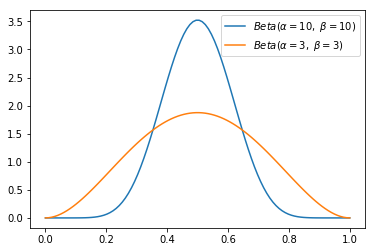

In [7]:
a1, b1 = 10, 10
rv1 = beta(a1, b1)

a2, b2 = 3, 3
rv2 = beta(a2, b2)

x = np.linspace(0, 1, 100)
plt.plot(x, rv1.pdf(x), label=r'$Beta(\alpha=10,\ \beta=10)$')
plt.plot(x, rv2.pdf(x), label=r'$Beta(\alpha=3,\ \beta=3)$')
plt.legend()
plt.show()

## Uninformative Prior
When we don’t know anything, the probability of landing head is **uniformly distributed**. This is a special case of Beta, and is parametrized as $Beta(\alpha=1, \beta=1)$.

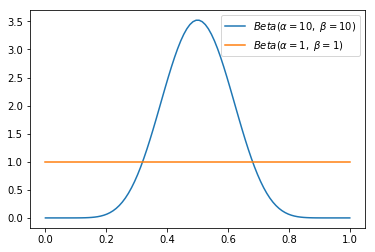

In [8]:
a1, b1 = 10, 10
rv1 = beta(a1, b1)

a2, b2 = 1, 1
rv2 = beta(a2, b2)

x = np.linspace(0, 1, 100)
plt.plot(x, rv1.pdf(x), label=r'$Beta(\alpha=10,\ \beta=10)$')
plt.plot(x, rv2.pdf(x), label=r'$Beta(\alpha=1,\ \beta=1)$')
plt.legend()
plt.show()

## Bayesian Updating
If we flip the coin and observe a head, we simply update $\alpha \leftarrow \alpha + 1$ (vice versa for $\beta$ ). This process is called Bayesian updating

## Building Intuition: A Simulation

In [11]:
import pandas as pd

In [12]:
def simulate_beta(prior_a, prior_b, p, n_trials):
    """
    Run Bayesian updating on prior, given true parameter.
    
    Parameters
    ----------
    prior_a int: prior alpha
    prior_b int: prior beta
    p float: true Bernoulli parameter
    n_trials int: number of iterations to run
    
    Return
    ------
    df DataFrame: parameters for Bernoulli trial p during each iteration
    df_ DataFrame: parameters for Bernoulli trial 1 - p during each iteration
    """
    a = prior_a
    b = prior_b

    df = pd.DataFrame({"a" : [a], "b" : [b]})
    df_ = pd.DataFrame({"a" : [a], "b" : [b]})
    for _ in range(n_trials):
        if np.random.rand() < p:
            a, b = df.iloc[-1].values
            a += 1
            df = df.append({"a" : a, "b" : b}, ignore_index=True)
            
            a, b = df_.iloc[-1].values
            b += 1
            df_ = df_.append({"a" : a, "b" : b}, ignore_index=True)
        else:
            a, b = df.iloc[-1].values
            b += 1
            df = df.append({"a" : a, "b" : b}, ignore_index=True)
            
            a, b = df_.iloc[-1].values
            a += 1
            df_ = df_.append({"a" : a, "b" : b}, ignore_index=True)
        
    return df, df_

In [13]:
n_trials = 1000
prior_a = 100
prior_b = 100

p = 0.2
df, df2 = simulate_beta(prior_a, prior_b, p=p, n_trials=n_trials)

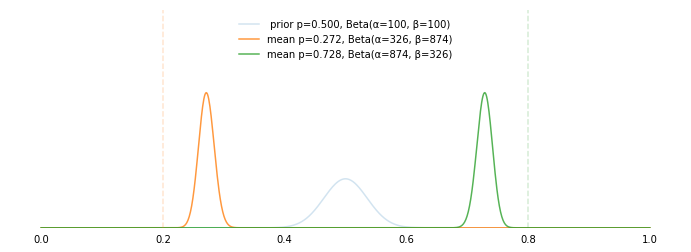

In [14]:
x = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(figsize=(12,4))

# -------------------------------------------
# plot prior
rv_prior = beta(prior_a, prior_b)
ax.plot(x, rv_prior.pdf(x), alpha=0.2)

# -------------------------------------------
# first graph
a, b = df.iloc[-1].values
rv = beta(a, b)
line, = ax.plot(x, rv.pdf(x), alpha=0.8, color='#ff7f0e')

# -------------------------------------------
# second graph
a2, b2 = df2.iloc[-1].values
rv2 = beta(a2, b2)
line2, = ax.plot(x, rv2.pdf(x), alpha=0.8, color='C2')

# -------------------------------------------
# ax.axvline(prior_a / (prior_a + prior_b), alpha=0.2, linestyle="--")
ax.axvline(p, alpha=0.2, linestyle="--", color='#ff7f0e')
ax.axvline(1-p, alpha=0.2, linestyle="--", color='C2')

# -------------------------------------------
# accessory
legend = [" prior p=%.3f, Beta(\u03B1=%i, \u03B2=%i)"%(prior_a / (prior_a + prior_b), prior_a, prior_b), 
          "mean p=%.3f, Beta(\u03B1=%i, \u03B2=%i)"%(a / (a + b), a, b),
          "mean p=%.3f, Beta(\u03B1=%i, \u03B2=%i)"%(a2 / (a2 + b2), a2, b2)]
ax.legend(legend, frameon=False, loc="upper center")

# -------------------------------------------
# minimalism style
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set_ylim(0, 50)

plt.show()

![](https://cdn-images-1.medium.com/max/1500/1*kaUJGFw9xHSXEf4YxKx1uw.gif)

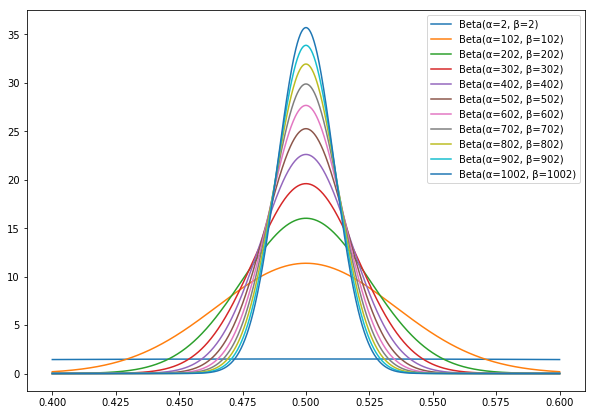

In [24]:
x = np.linspace(0.4, 0.6, 1001)
plt.figure(figsize=(10,7))
for i in range(2, 1003, 100):
    rv = beta(i, i)
    plt.plot(x, rv.pdf(x), label="Beta(\u03B1=%i, \u03B2=%i)"%(i,i))

plt.legend()
plt.show()

## The Effect of Prior
![](https://cdn-images-1.medium.com/max/1500/1*mMYb07UbYLCS3nJHv0Ep0A.gif)

![](https://cdn-images-1.medium.com/max/1500/1*YN48zFbH6sEpOe-cbBjfbg.gif)

![](https://cdn-images-1.medium.com/max/1500/1*RV087VG2ntly7mIEEML2oQ.gif)

## Baseball Batting Statistics

For a concrete example of real-world application, let’s consider the baseball batting average. The national batting average is 0.27. If some new player joins the game with no records on prior performance, we may compare him to the national average to see if he is any good. The prior is formulated as $Beta(\alpha=81, \beta=219)$ to give the 0.27 expectation. As he swings his bat, we update $\alpha$ and $\beta$ along the way. After 1000 bats, we observe 300 hits and 700 misses. The posterior becomes $Beta(\alpha=81 + 300, \beta=219 + 700)$, with expectation $381 / (381 + 919) = 0.293$.

![](https://cdn-images-1.medium.com/max/1500/1*04RIaCdLHB4eUPUXivVkqg.gif)

[source link](https://towardsdatascience.com/visualizing-beta-distribution-7391c18031f1)